In [1]:
import os
from tqdm import tqdm
import librosa
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns

In [2]:
FRAME_SIZE = 1024
N_MELS = 128
N_MFCC = 40
N_FTT = 1024
HOP_LENGTH = 512
POWER = 2.0
SR = 16000
DURATION = 10
FRAMES = int(np.ceil(SR * 10 / HOP_LENGTH))

In [3]:
file_path = "data/dcase2023t2/dev/fan/train/section_00_source_train_normal_0000_m-n_X.wav"

### Plot waveform

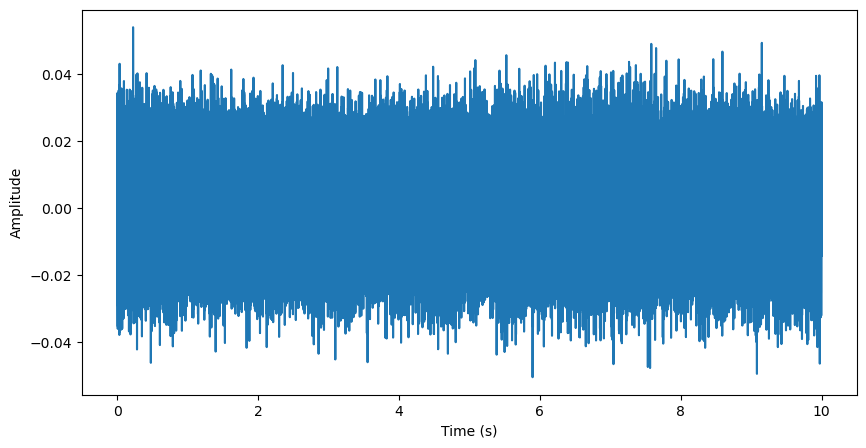

In [14]:
y, sr = librosa.load(file_path, sr=SR, duration=DURATION)
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(y)) / SR, y)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.savefig("exploration/plots/figures/waveform.png", bbox_inches="tight")

### Plot melspectrogram

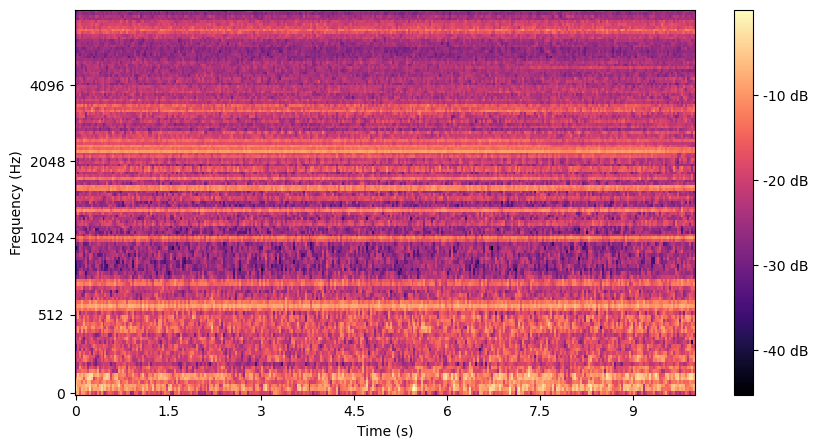

In [15]:
S = librosa.feature.melspectrogram(y=y, sr=SR, n_fft=N_FTT, hop_length=HOP_LENGTH, n_mels=N_MELS, power=POWER)
S_DB = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(10, 5))
librosa.display.specshow(S_DB, sr=SR, hop_length=HOP_LENGTH, x_axis="time", y_axis="mel")
plt.colorbar(format="%+2.f dB")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.savefig("exploration/plots/figures/mel_spectrogram.png", bbox_inches="tight")